Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [185]:
NAME = "Jingren Wang"
COLLABORATORS = "N.A."

---

# CS110 Pre-class Work 3.2

## Question 1.
Given the array `H=[39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]`, perform the following operations:
1. Draw the corresponding binary tree of H. Is the binary tree a valid max heap? Explain your answer.
2. Using as a model the drawing examples illustrated in Figure 6.2 of Cormen et al.,  draw a step-by-step transformation of the array above into a valid max heap. 
3. Now that you have obtained a valid max heap, write out the corresponding array that stores the valid max-heap.

Use as many cells as you wish for this question.

Q1. The max-heap property states that all child nodes must be no greater than its parent node. Thus, the corresponding binary tree of H is not a valid max heap as some child nodes are bigger than their respective parent nodes (in red)

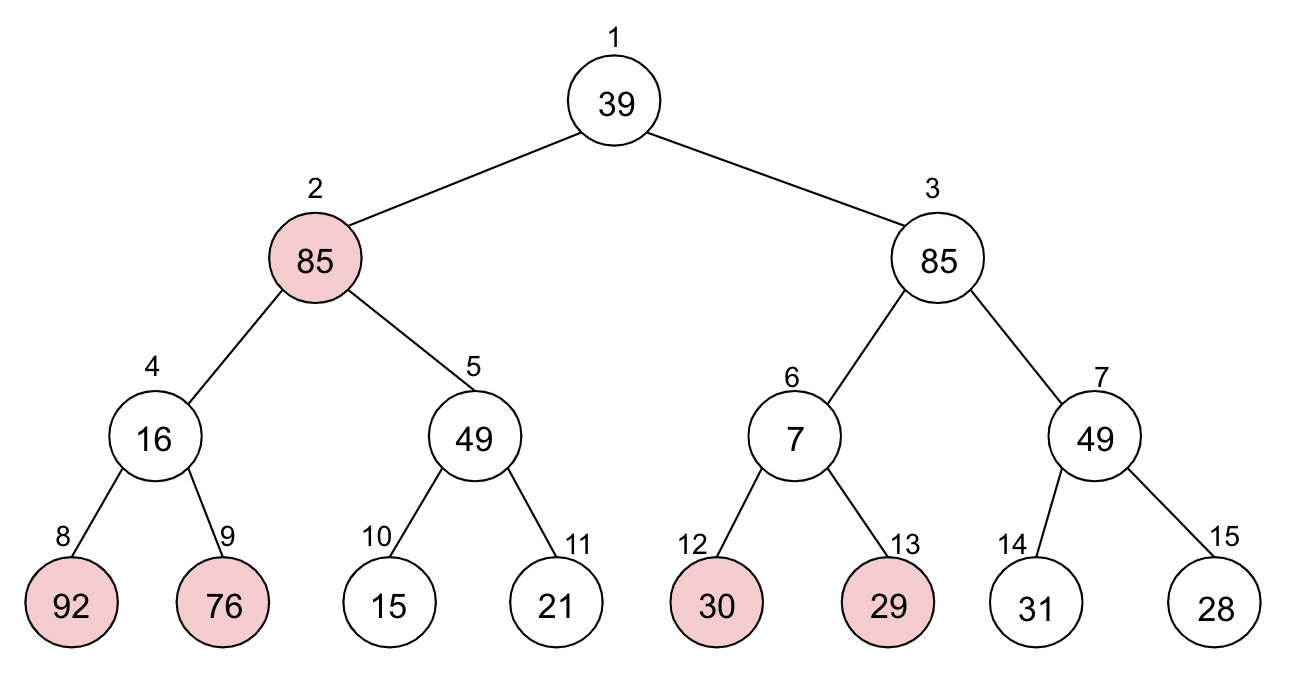

Q2. we let max-heap violating nodes to 'float down' in the max-heap by swapping nodes between a parent and its child, and turn the binary tree into a valid max heap: 

Assuming we only use the MAX-HEAPIFY function, and always run from i=0 
to check for further violation of max-heap when the current MAX-HEAPIFY terminates. (rather than the bottom-up approach of build_max_heap.

step 1:  swap A [1] with A [2]

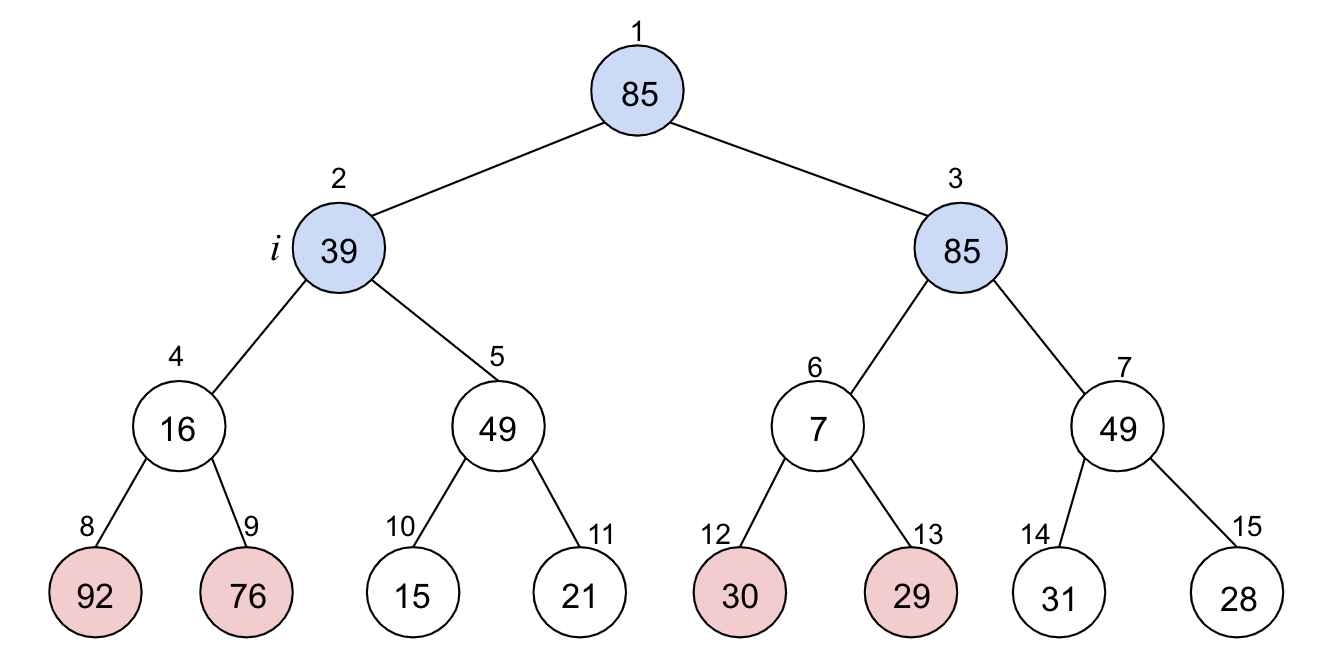

step 2: swap A [2] with A [5]
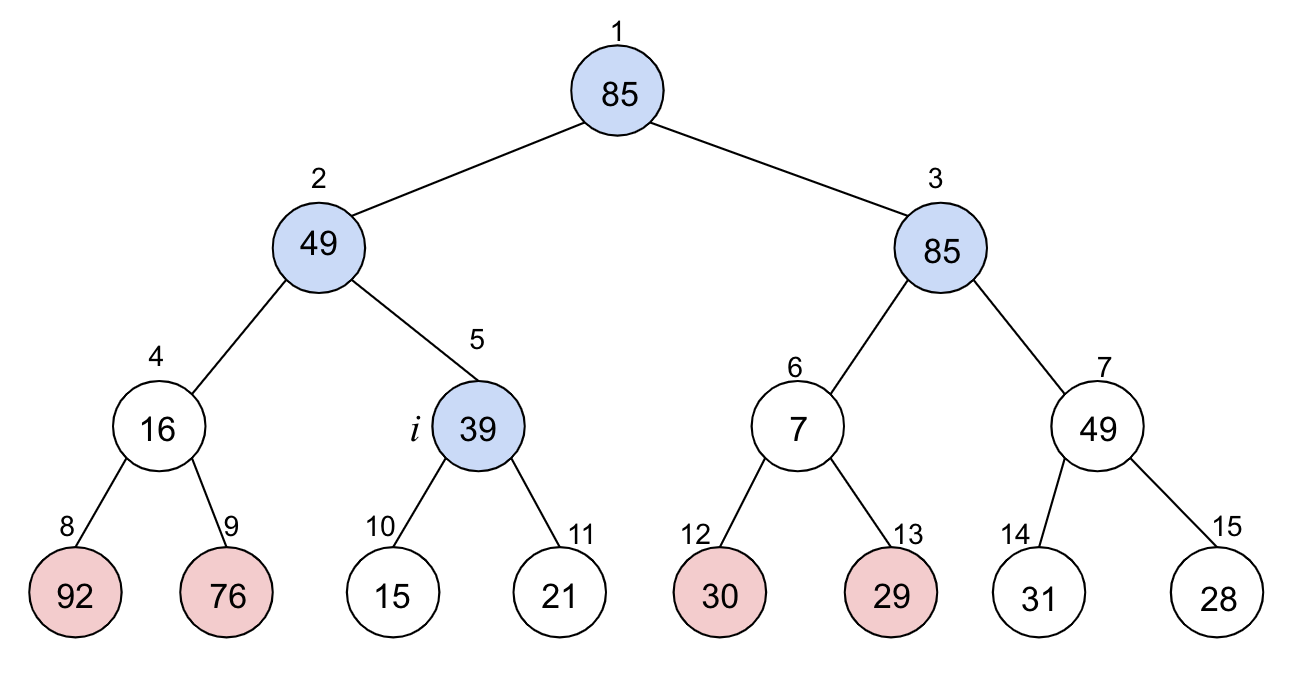

now, the MAX-HEAPIFY function will terminate as 39 is the largest of the subtree.

Next, as we restart index from i=0 for the updated A, we will find the subtree rooted at i=4 non heap-max, then swap A[8] with A[4], and function terminates as we reach the base again:
 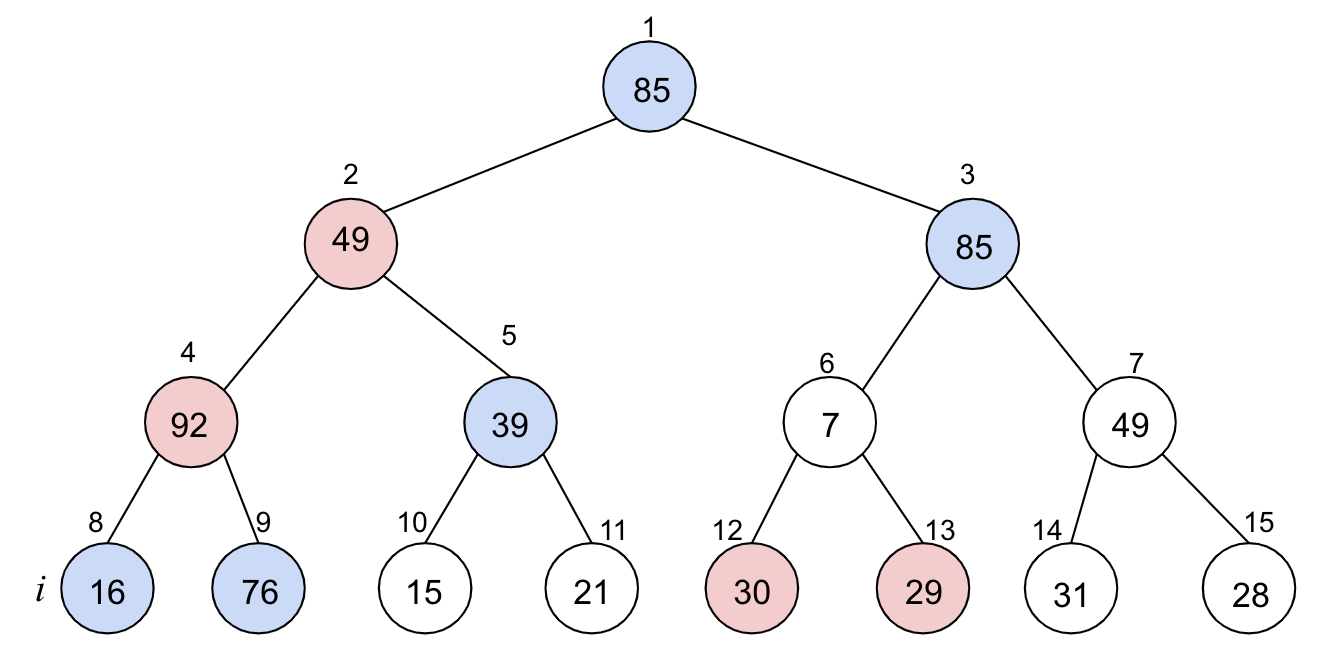



reset i=0 to check for further violations, this time i=2 is again non max-heap as the newly swapped 92 (child) is bigger than its parent 49 , we swap the two, and update 'largest' to index 4
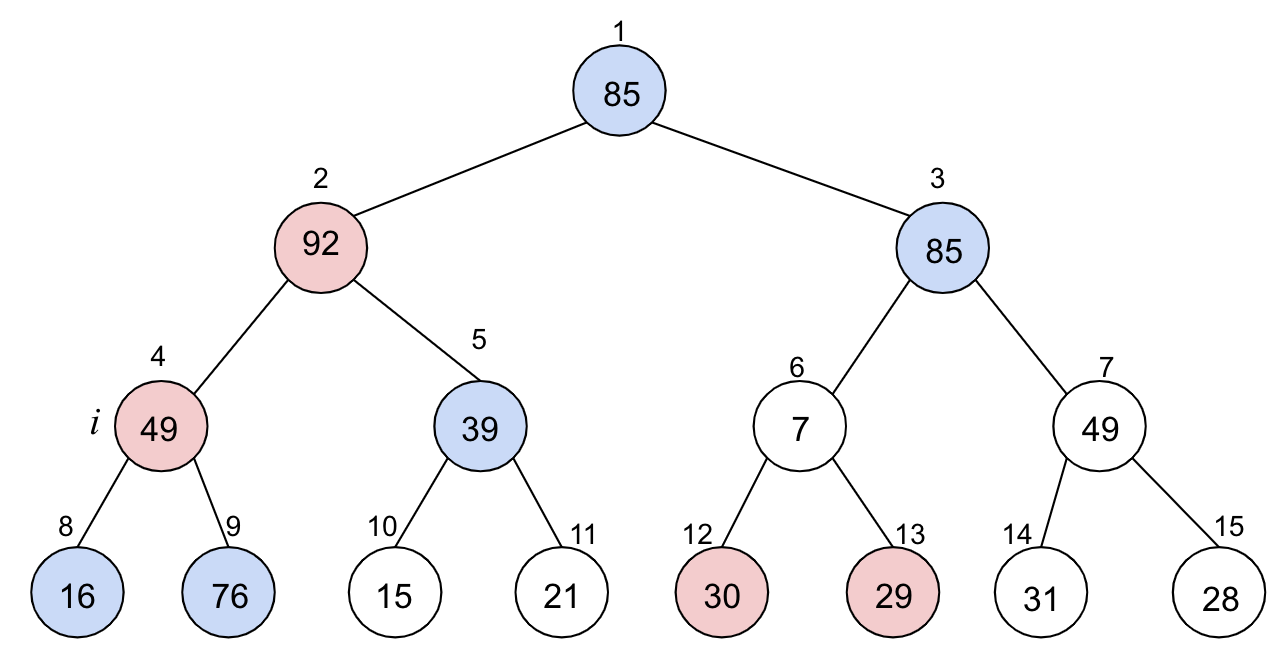
and then swap A[4]=49, and A[9]= 76,
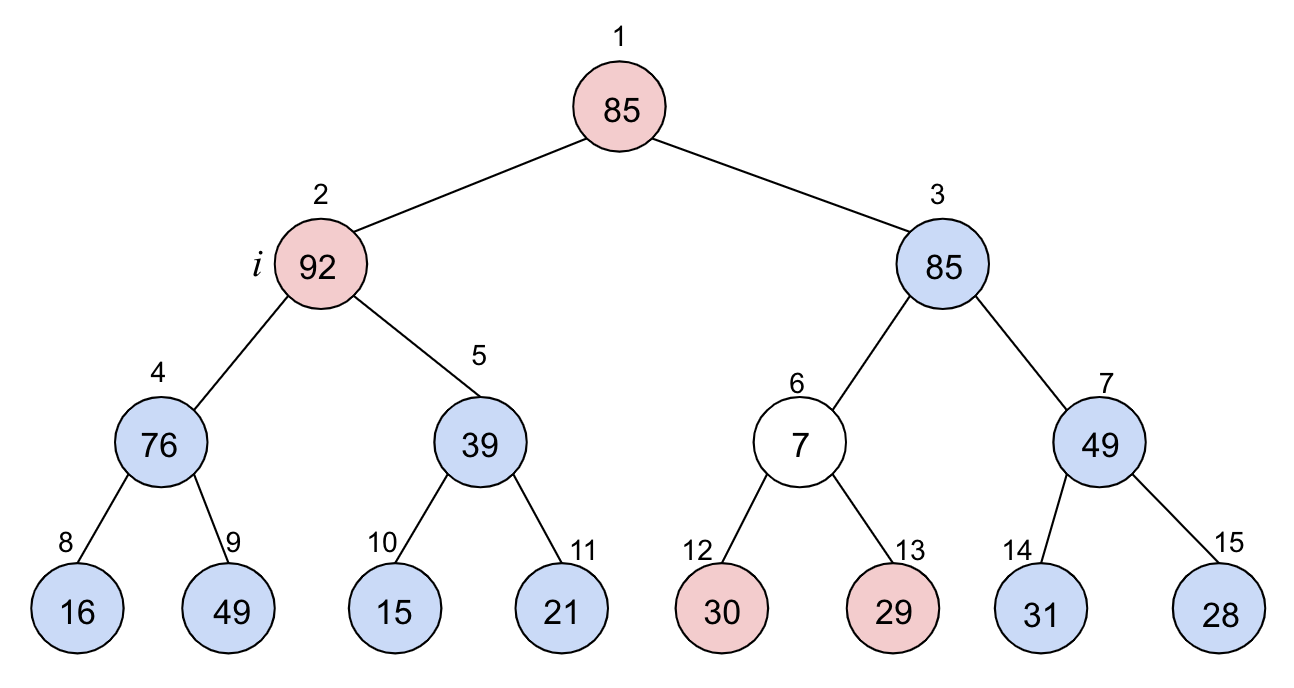


base reached, function terminates again.


reset i=0 to check for further violations based on updated array A: this time, violation starts from first root A[1], swap A[1]=85, with A[2] = 92, 
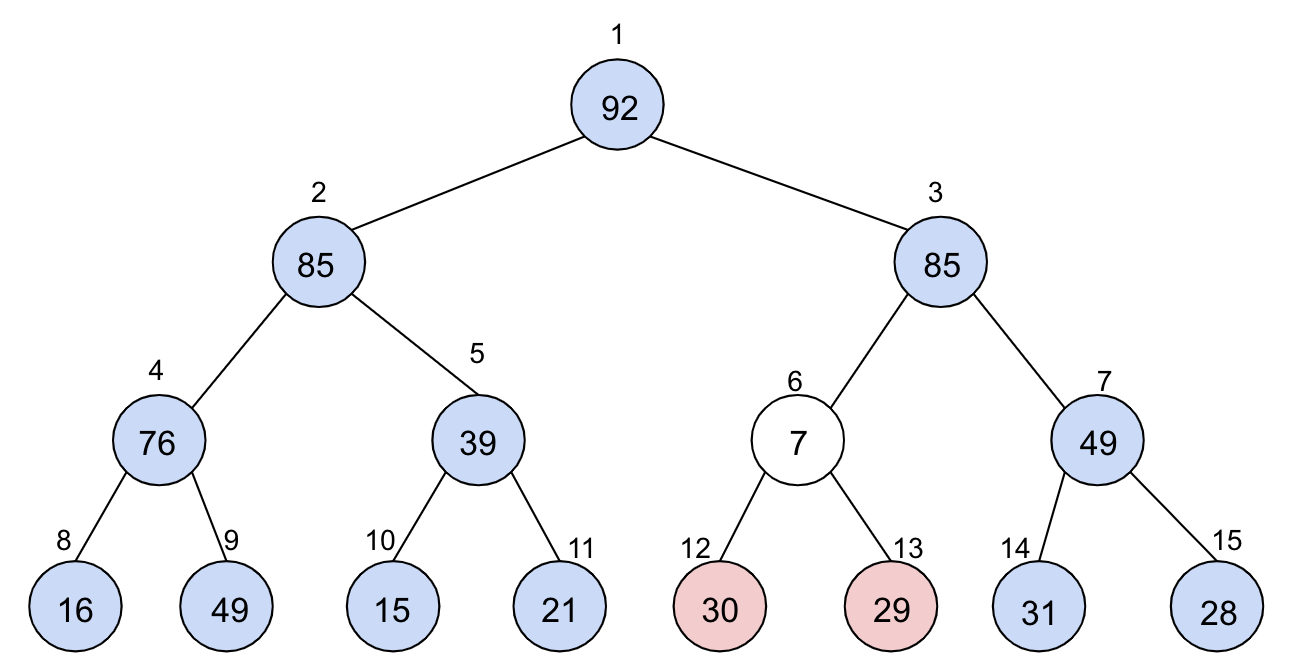
Function will terminate again as new subtree of 85-(76,39) is max heap. 

Finally, fix the subtree rooted at i=7 by swapping 30 and 7.

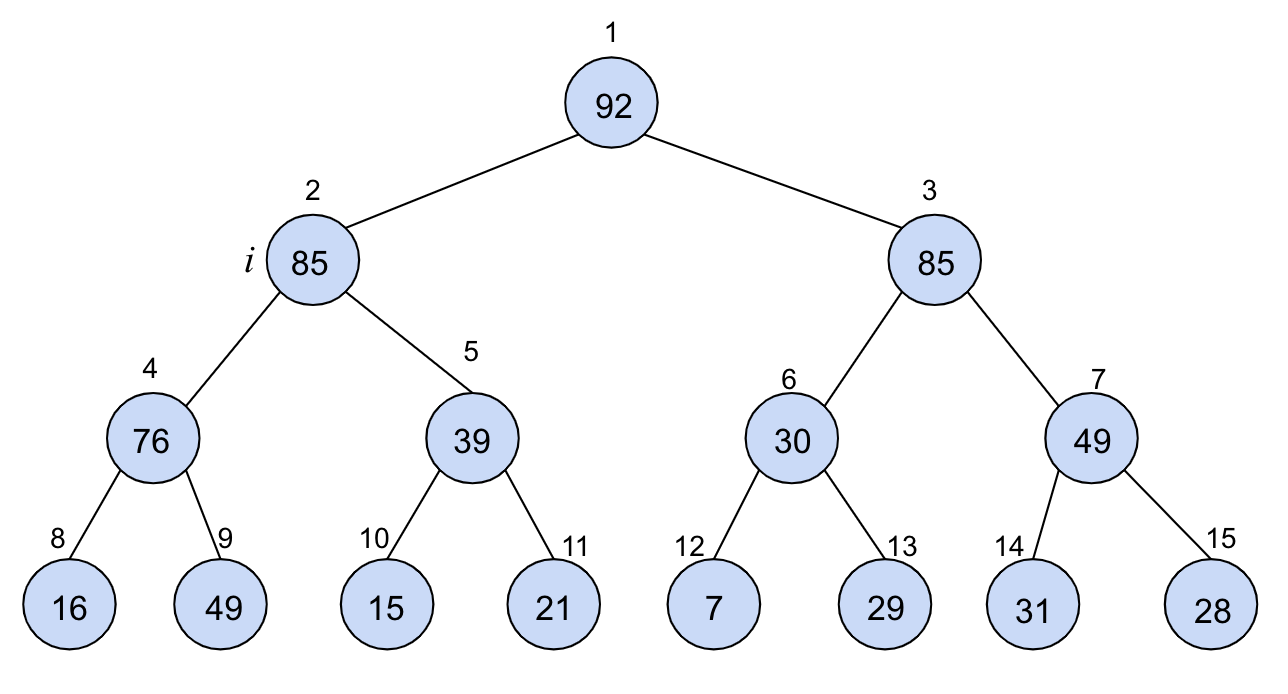

Q3: the valid max heap array would be <br>

A_max_heap = [ 92, 85, 85, 76, 39, 30, 49, 16, 49, 15, 21, 7, 29, 31, 28 ] 

## Question 2. 
Consider the following questions on the $MAX-HEAPIFY$ operation.
### Question 2a.

In the pseudocode of $MAX-HEAPIFY$ (Cormen et al., p.154, or you can view it [here](https://drive.google.com/open?id=1e_3jsX4-qQCfZXKMok_T6LPFh9FwtmT5)), what does A.heap-size mean and what is the idea behind the local variable largest? 


   The max-heapify function concerns only a subtree (1 parent, 2 children) rooted at index i, and assume A[i], the parent, to be the largest, stored in a local variable *largest* = i, however, if one of the children is larger than the parent, the two swaps to make the subtree rooted at i a max-heap. The new *largest* stores the index of the parent's new location, and is carried forward as the new root index i when the function is recurisvely called again. <br>
There are two ways that the recursive call terminates:
   1. that the new rooted i already contains the largest value of its subtree;
   2. that the new rooted i is at base level such that the new child indices l and r are out of range of array A. <br>
   this is why we need to compare l or r with A.heap-size (which is the length of array A) to check if the new root index has reached its bottom.

### Question 2b.
The functions $LEFT(i)$ and $RIGHT(i)$, lines 1 and 2 in the $MAX-HEAPIFY$ pseudocode, return the array index of the left and right child, respectively, of a node in a binary tree. From reading Section 6.1, you know that the input to both functions is an integer number, $i$, which corresponds to the array index of the parent node in the array. Review Section 6.1 for more information. Write a Python implementation of the functions $LEFT(i)$ and $RIGHT(i)$ by filling in the cells below.

In [186]:
def left(i):
    # returns the arry index of the left child
    # python list index starts from 0
    return (2*i+1)
    # YOUR CODE HERE
    raise NotImplementedError()

In [187]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

In [188]:
def right(i):
    
    return (2*i+2)
    raise NotImplementedError()

In [189]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Question 2c.
Write a Python implementation of the MAX-HEAPIFY operation using the pseudocode above, and your newly written functions, `left` and `right`.

In [190]:
def heapify(heap, i):
    """
    Inputs:
    - heap: a list of floats. Assume that the heap size is the length of the heap.
    
    No output is needed. This function should modify (if necessary) heap in-place.
    """
    heap_size = len(A)-1 # minus 1 as the max list index is length-1 
    
    l = left(i)  # return index of left child of parent A[i]  
    r = right(i) # return index of right child of parent A[i]
     
    # compare parent with left child, given child exists
    if l<= heap_size and A[l] > A[i]:  
        largest = l # assign local index var 'largest' to l
    else:
        largest = i
        
    # compare parent with right child, given left child not the largest AND right child exists
    if r<= heap_size and A[r] > A[largest]:
        largest = r # update var largest
    
    # swap elements if parent is not the largest
    if largest != i:
        A[i],A[largest] = A[largest], A[i]
        
        heapify(heap, largest)  #recur


In [191]:
# my doodle for function inspection
def heapify_inspect(heap, i):
    """
    Inputs:
    - heap: a list of floats. Assume that the heap size is the length of the heap.
    
    No output is needed. This function should modify (if necessary) heap in-place.
    """
    heap_size = len(A)-1 # minus 1 as the max list index is length-1 
    
    l = left(i)  # return index of left child of parent A[i]
    print('   left_idx =',l)
    r = right(i) # return index of right child of parent A[i]
    print('   right_idx =',r)
    
    if l<= heap_size and A[l] > A[i]:  # compare parent with left child, given child exists
        largest = l # assign local index var 'largest' to l
    else:
        largest = i
        
        # compare parent with right child, given left child not the largest AND right child exists
    if r<= heap_size and A[r] > A[largest]:
        largest = r # update var largest
    
    print('current_i: ', i)
    print('current_largest: ', largest)
    print('')
            
    if largest != i:
        A[i],A[largest] = A[largest], A[i]
        heapify(heap, largest)

        
A = [39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]
heapify_inspect(A,0)
A

   left_idx = 1
   right_idx = 2
current_i:  0
current_largest:  1



[85, 49, 85, 16, 39, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]

In [192]:
A = [39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]
heapify(A,0)
assert(A == [85, 49, 85, 16, 39, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28])


## Question 3. 
Next, write a Python implementation of the BUILD_MAX_HEAP operation using the pseudocode provided in Section 6.3 of Cormen et. al. Test your Python implementation using the array in problem 1, and make sure your Python codes produce a valid max heap.

In [200]:
import math

def build_max_heap(A):
    """
    Input:
    - A: a list of floats.
    
    No output is needed. The function should turn A into a valid max heap, in-place.
    """
    heap_size = len(A)-1 # same reason as in heapify()
    idx_1st_root = math.floor(len(A)/2)-1
    for i in range(idx_1st_root, -1, -1): # index from 1st root node down to 0 (the root root)
        #print(' i=', i)
        heapify(A, i)
        
       

In [201]:
# my doodle
A = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
build_max_heap(A)
print(A)

[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]


In [202]:
A = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
build_max_heap(A)
assert(A == [16, 14, 10, 8, 7, 9, 3, 2, 4, 1])

## Question 4. 

Lastly, write Python implementations of the $MIN-HEAPIFY$ and $BUILD-MIN-HEAP$ operations for a min heap data structure. You can use your $MAX-HEAPIFY$ and $BUILD-MAX-HEAP$ Python function as models, just remember that the latter two functions support operations for the max heap data structure. Test your Python implementation of $BUILD-MIN-HEAP$ using the array in problem 1, and make sure your Python codes produce a valid min heap. 

In [203]:
def min_heapify(A, i):

    heap_size = len(A)-1 # minus 1 as the max list index is length-1 
    
    l = left(i)  # return index of left child of parent A[i]  
    r = right(i) # return index of right child of parent A[i]
     
    # compare parent with left child, given child exists
    if l<= heap_size and A[l] < A[i]:  
        smallest = l # assign local index var 'smallest' to l
    else:
        smallest = i
        
    # compare parent with right child, given left child not the largest AND right child exists
    if r<= heap_size and A[r] < A[smallest]:
        smallest = r # update var smallest
    
    # swap elements if parent is not the smallest
    if smallest != i:
        A[i],A[smallest] = A[smallest], A[i]
        
        min_heapify(A, smallest)  #recur

    
    # YOUR CODE HERE
    #raise NotImplementedError()

In [204]:
def build_min_heap(A):

    heap_size = len(A)-1 # same reason as in heapify()
    idx_1st_root = math.floor(len(A)/2)-1

    for i in range(idx_1st_root, -1, -1): # index from 1st root node down to 0 (the root root)
        #print(' i=',i)
        min_heapify(A, i)
        
  

In [205]:
# test case:
        
A1 = [39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]
build_min_heap(A1)
print(A1)

A2 = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
build_min_heap(A2)
print(A2)


[7, 15, 28, 16, 21, 29, 31, 92, 76, 49, 85, 30, 85, 39, 49]
[1, 2, 3, 4, 7, 9, 10, 14, 8, 16]


In [199]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 